## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [40]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [41]:
# your code here
data = pd.read_csv('german_credit.csv')

In [42]:
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [43]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [44]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

status - порядковый признак, потому что можно расставить по порядку значения:no checking account -> ... < 0 DM -> 0<= ... < 200 DM -> ... >= 200 DM / salary for at least 1 year
duration - количественный признак
credit_history - категориальный признак
purpose - категориальный признак
amount - количественный признак
savings - порядковый признак, по аналогии с status
employment_duration - порядковый признак
installment_rate - порядковый признак
personal_status_sex - категориальный признак
other_debtors - категориальный признак
present_residence - порядковый признак
property - категориальный признак
age - количественный признак
other_installment_plans - категориальный признак
housing - категориальный признак
number_credits - порядковый признак
job - категориальный признак
people_liable - порядковый признак
telephone - бинарный признак
foreign_worker - бинарный признак
credit_risk - бинарный признак

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
status                     1000 non-null object
duration                   1000 non-null int64
credit_history             1000 non-null object
purpose                    1000 non-null object
amount                     1000 non-null int64
savings                    1000 non-null object
employment_duration        1000 non-null object
installment_rate           1000 non-null object
personal_status_sex        1000 non-null object
other_debtors              1000 non-null object
present_residence          1000 non-null object
property                   1000 non-null object
age                        1000 non-null int64
other_installment_plans    1000 non-null object
housing                    1000 non-null object
number_credits             1000 non-null object
job                        1000 non-null object
people_liable              1000 non-null object
telephone                  1000 n

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [46]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [47]:
data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0] / data[(data['age'] < 30)].shape[0] * 100

66.66666666666666

In [48]:
data[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] / data[(data['age'] > 40)].shape[0] * 100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [49]:
data['number_credits'].value_counts()

1        633
3-Feb    333
5-Apr     28
>= 6       6
Name: number_credits, dtype: int64

In [50]:
data[(data['foreign_worker'] == 'yes') & (data['number_credits'] != '1') & (data['number_credits'] != '3-Feb')].shape[0]


1

### Задание 6 (1 балл)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

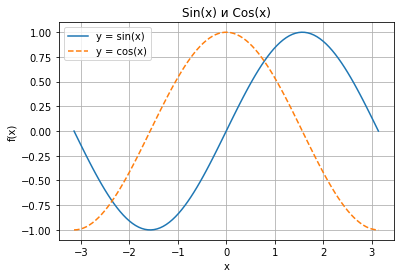

In [52]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.title("Sin(x) и Cos(x)") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("f(x)") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(x, y1)  # построение графика
plt.plot(x, y2, '--')
plt.legend(["y = sin(x)", "y = cos(x)"])

### Задание 7 (1 балл)

In [53]:
good_dict = dict(data[data['credit_risk'] == 'good'].groupby('status')['credit_risk'].count())
bad_dict =  dict(data[data['credit_risk'] == 'bad'].groupby('status')['credit_risk'].count())

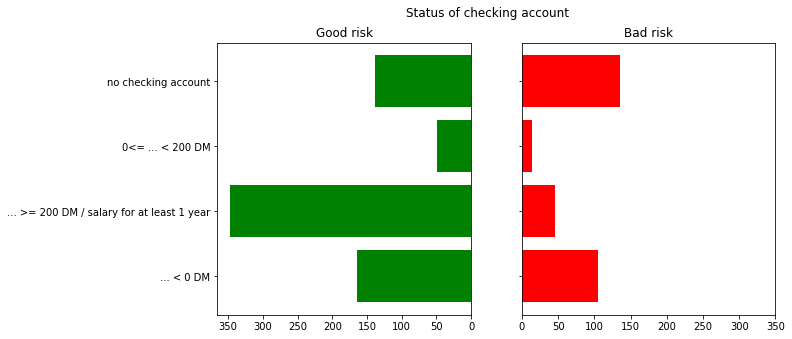

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True, figsize = (10, 5))
fig.suptitle('Status of checking account')
ax[0].barh(list(good_dict.keys()), list(good_dict.values()),color='g')
ax[0].set_title('Good risk')
ax[0].invert_xaxis() 
ax[1].barh(list(bad_dict.keys()), list(bad_dict.values()),color='r')
ax[1].set_title('Bad risk')
ax[1].set_xlim([0, 350])
plt.show()

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [55]:
# your code here

### Задание 8  (0.5 балла)

In [56]:
import seaborn as sns

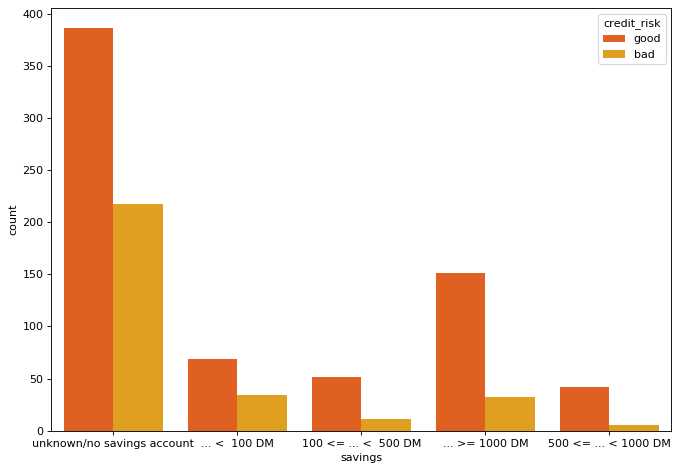

In [58]:
plt.figure(figsize=(10,7), dpi= 80)
sns.countplot(x='savings',hue='credit_risk', data=data, palette='autumn')

plt.show()

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

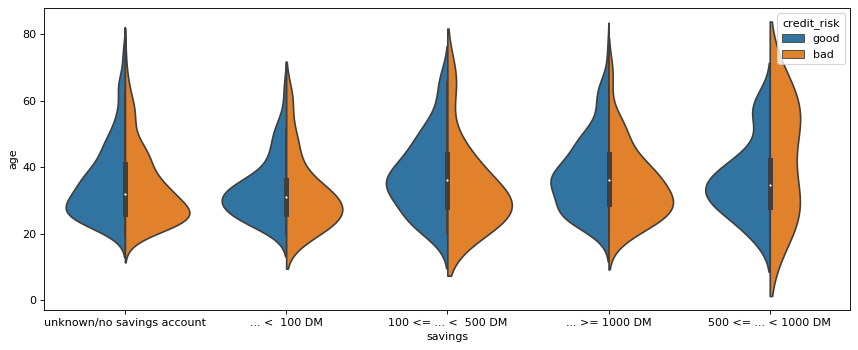

In [59]:
plt.figure(figsize=(13,5), dpi= 80)
sns.violinplot(x = 'savings', y = 'age', hue='credit_risk', data = data, split=True)
plt.show()

In [60]:
# your code here

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

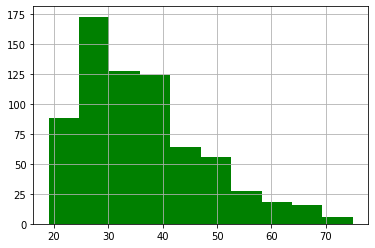

In [61]:
h1 = data[data['credit_risk'] == 'good']['age'].hist(color='g')
fig = h1.get_figure()

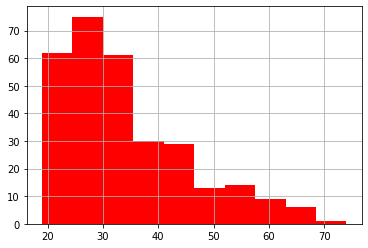

In [62]:
h2 = data[data['credit_risk'] == 'bad']['age'].hist(color='r')
fig = h2.get_figure()

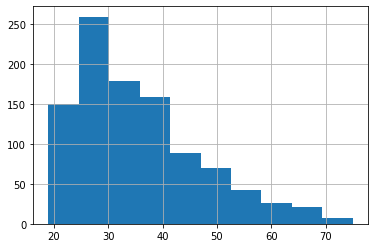

In [63]:
h3 = data['age'].hist()
fig = h3.get_figure()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

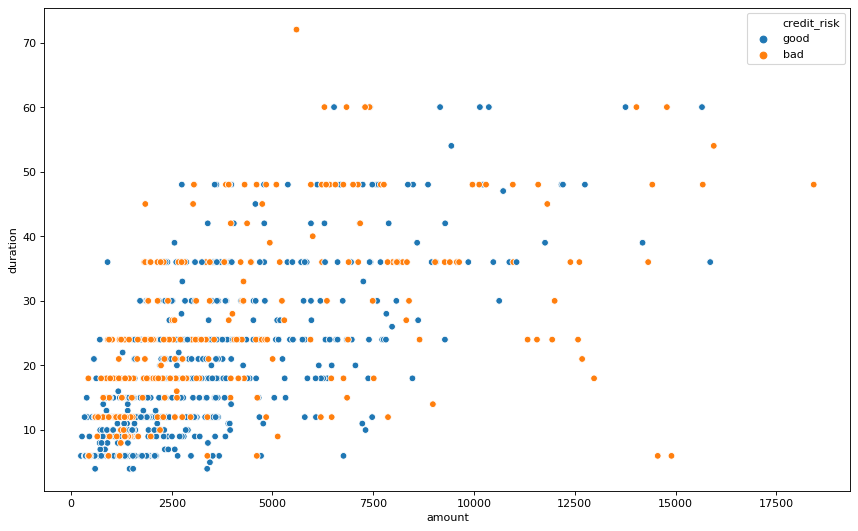

In [64]:
plt.figure(figsize=(13,8), dpi= 80)
sns.scatterplot(x='amount',y='duration',hue='credit_risk',data=data)
plt.show()

In [65]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

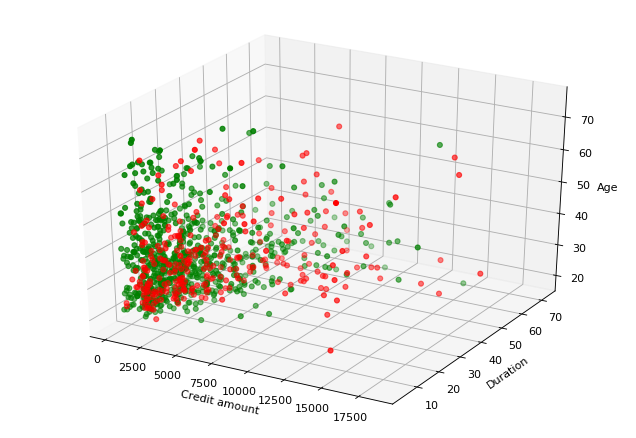

In [66]:
from mpl_toolkits.mplot3d import Axes3D
x = data[data['credit_risk'] == 'good']['amount']
y = data[data['credit_risk'] == 'good']['duration']
z = data[data['credit_risk'] == 'good']['age']
x1 = data[data['credit_risk'] == 'bad']['amount']
y1 = data[data['credit_risk'] == 'bad']['duration']
z1 = data[data['credit_risk'] == 'bad']['age']
fig = plt.figure(figsize=(10, 7), dpi = 80)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c='green')
ax.scatter(x1, y1, z1, c='red')
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

plt.show()

In [67]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [68]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [69]:
data = pd.get_dummies(data, columns=['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 
                           'personal_status_sex', 'other_debtors', 'present_residence', 'property', 
                           'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 
                           'foreign_worker'])


In [70]:
data['credit_risk']= data['credit_risk'].apply(lambda x: 1 if x == "good" else 0)

In [71]:
data['credit_risk'].value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [72]:
def predict(Xtest: np.array) -> np.array:
    prediction = np.zeros(len(Xtest))
    for i in range(len(Xtest)):
        a = Xtest[i]
        answer =a[0]/72 - a[1]/18424 - 3*a[2]/75 -a[4] + a[5] + a[6] - a[7] + 2*a[8] - a[22] + a[23] - a[24] + a[25] - 3*a[26] + a[27]
        + a[28] + a[29] + a[30] - a[31] - 2*a[60] - a[65] + a[66] + 2*a[61] + a[62] - 5*a[63] - 5*a[64]
        if(answer > -6):
            prediction[i] = 1
        else:
            prediction[i] = 0
    return prediction

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
print(accuracy_score(y_test, predict(X_test)))

0.592
